HOTEL PRICE FLUCTUATIONS
---
How do hotel prices fluctuate over time in different regions?

In [151]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [152]:
#File to load
hotel_bookings_file = Path("Resources/hotel_bookings Dataset2.csv")

#Read file and store into Pandas DataFrames
hotel_data = pd.read_csv(hotel_bookings_file)

#display data
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Data cleaning 
---

In [153]:
# Remove specified columns from the DataFrame
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'reservation_status_date', 'is_canceled', 'lead_time',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations'
]

hotel_data = hotel_data.drop(columns=columns_to_remove)
hotel_data.head()

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,country,adr
0,Resort Hotel,2015,July,0,0,PRT,0.0
1,Resort Hotel,2015,July,0,0,PRT,0.0
2,Resort Hotel,2015,July,0,1,GBR,75.0
3,Resort Hotel,2015,July,0,1,GBR,75.0
4,Resort Hotel,2015,July,0,2,GBR,98.0


In [154]:
#display the columns 
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   arrival_date_year        119390 non-null  int64  
 2   arrival_date_month       119390 non-null  object 
 3   stays_in_weekend_nights  119390 non-null  int64  
 4   stays_in_week_nights     119390 non-null  int64  
 5   country                  118902 non-null  object 
 6   adr                      119390 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 6.4+ MB


In [155]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'
hotel_data['total_stays_days'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']

# Optionally, you can drop the original columns if you no longer need them
hotel_data = hotel_data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

# Display the updated DataFrame
hotel_data


,hotel,arrival_date_year,arrival_date_month,country,adr,total_stays_days
0,Resort Hotel,2015,July,PRT,0.00,0
1,Resort Hotel,2015,July,PRT,0.00,0
2,Resort Hotel,2015,July,GBR,75.00,1
3,Resort Hotel,2015,July,GBR,75.00,1
4,Resort Hotel,2015,July,GBR,98.00,2
...,...,...,...,...,...,...
119385,City Hotel,2017,August,BEL,96.14,7
119386,City Hotel,2017,August,FRA,225.43,7
119387,City Hotel,2017,August,DEU,157.71,7
119388,City Hotel,2017,August,GBR,104.40,7


In [156]:
# Rearrange the columns
columns_order = [
    'country', 'adr','arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel'
] + [col for col in hotel_data.columns if col not in ['country', 'adr', 'arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel']]

hotel_data = hotel_data[columns_order]

# Rename columns
hotel_data = hotel_data.rename(columns={
    'adr': 'average daily rate',
    'hotel': 'hotel type'
})

hotel_data


,country,average daily rate,arrival_date_year,arrival_date_month,total_stays_days,hotel type
0,PRT,0.00,2015,July,0,Resort Hotel
1,PRT,0.00,2015,July,0,Resort Hotel
2,GBR,75.00,2015,July,1,Resort Hotel
3,GBR,75.00,2015,July,1,Resort Hotel
4,GBR,98.00,2015,July,2,Resort Hotel
...,...,...,...,...,...,...
119385,BEL,96.14,2017,August,7,City Hotel
119386,FRA,225.43,2017,August,7,City Hotel
119387,DEU,157.71,2017,August,7,City Hotel
119388,GBR,104.40,2017,August,7,City Hotel


Exploratory Data Analysis (EDA)
---

In [157]:
#checking the number of countries in the clean dataframe.
countries_total = hotel_data["country"].nunique()
countries_total

177

In [175]:
country_mapping = {
    'AIA': 'Anguilla',
    'AND': 'Andorra',
    'BGD': 'Bangladesh',
    'BHR': 'Bahrain',
    'COM': 'Comoros',
    'DJI': 'Djibouti',
    'FRO': 'Faroe Islands',
    'GAB': 'Gabon',
    'GEO': 'Georgia',
    'GIB': 'Gibraltar',
    'KAZ': 'Kazakhstan',
    'LAO': 'Laos',
    'MMR': 'Myanmar',
    'MYT': 'Mayotte',
    'NCL': 'New Caledonia',
    'PHL': 'Philippines',
    'PYF': 'French Polynesia',
    'QAT': 'Qatar',
    'SLV': 'El Salvador',
    'UMI': 'United States Minor Outlying Islands',
}

# Replace initials with full country names
hotel_data['country'] = hotel_data['country'].replace(country_mapping)

# Group data by 'country' and calculate the average daily rate
average_rate_by_country = hotel_data.groupby('country')['average daily rate'].mean().reset_index()

# Rename the columns for clarity
average_rate_by_country.columns = ['Country', 'Average Daily Rate']

# Sort the DataFrame to find the top 20 countries by average daily rate
top_20_average_rate = average_rate_by_country.sort_values(by='Average Daily Rate', ascending=False).head(20)

# Display the resulting DataFrame
top_20_average_rate

,Country,Average Daily Rate
48,Djibouti,273.000000
13,Anguilla,265.000000
12,Andorra,202.652857
170,United States Minor Outlying Islands,200.000000
103,Laos,181.665000
119,Mayotte,177.750000
128,New Caledonia,175.500000
69,Georgia,169.015909
42,Comoros,165.305000
58,Faroe Islands,155.200000


In [159]:
# Define the desired order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'arrival_date_month' to a categorical type with the specified order
hotel_data['arrival_date_month'] = pd.Categorical(hotel_data['arrival_date_month'], categories=month_order, ordered=True)

# Group data by 'arrival_date_month' and calculate the average daily rate
average_rate_by_month = hotel_data.groupby('arrival_date_month')['average daily rate'].mean().reset_index()

# Rename the columns for clarity
average_rate_by_month.columns = ['Arrival Date Month', 'Average Daily Rate']


# Display the resulting DataFrame
average_rate_by_month


/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_25379/3839048118.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_month = hotel_data.groupby('arrival_date_month')['average daily rate'].mean().reset_index()


,Arrival Date Month,Average Daily Rate
0,January,70.361241
1,February,73.582276
2,March,80.679646
3,April,100.380790
4,May,108.695516
5,June,116.672192
6,July,126.788013
7,August,140.111523
8,September,105.049657
9,October,87.908879


In [160]:
# Filter for the desired months
months_of_interest = ['April', 'May', 'June', 'July', 'August']
filtered_data = hotel_data[hotel_data['arrival_date_month'].isin(months_of_interest)]

# Group by country and sum total stays
total_stays_by_country = filtered_data.groupby('country')['total_stays_days'].sum().reset_index()

# Sort the results to find the countries with the most total stays
total_stays_by_country = total_stays_by_country.sort_values(by='total_stays_days', ascending=False)

# Keep only the top 20 countries
top_20_countries = total_stays_by_country.head(20)

# Rename the columns for clarity
top_20_countries.columns = ['Country', 'Total Stays Days']

# Display the resulting DataFrame
top_20_countries


,Country,Total Stays Days
121,PRT,73987
55,GBR,32621
52,FRA,18323
39,DEU,14498
47,ESP,13978
68,IRL,10536
73,ITA,6435
13,BEL,5145
109,NLD,3987
26,CHE,3921


In [173]:
country_mapping = {
    'AIA': 'Anguilla',
    'AND': 'Andorra',
    'BGD': 'Bangladesh',
    'BHR': 'Bahrain',
    'COM': 'Comoros',
    'DJI': 'Djibouti',
    'FRO': 'Faroe Islands',
    'GAB': 'Gabon',
    'GEO': 'Georgia',
    'GIB': 'Gibraltar',
    'KAZ': 'Kazakhstan',
    'LAO': 'Laos',
    'MMR': 'Myanmar',
    'MYT': 'Mayotte',
    'NCL': 'New Caledonia',
    'PHL': 'Philippines',
    'PYF': 'French Polynesia',
    'QAT': 'Qatar',
    'SLV': 'El Salvador',
    'UMI': 'United States Minor Outlying Islands',
}

# Replace initials with full country names
hotel_data['country'] = hotel_data['country'].replace(country_mapping)

# List of countries to analyze
countries_of_interest = list(country_mapping.values())

# Calculate the average daily rate for the specified countries
average_daily_rates = hotel_data[hotel_data['country'].isin(countries_of_interest)].groupby('country')['average daily rate'].mean().reset_index()

# Display the results
print("Average Daily Rates for Selected Countries:")
print(average_daily_rates)

Average Daily Rates for Selected Countries:
                                 country  average daily rate
0                                Andorra          202.652857
1                               Anguilla          265.000000
2                                Bahrain          145.330000
3                             Bangladesh          149.802500
4                                Comoros          165.305000
5                               Djibouti          273.000000
6                            El Salvador          148.850000
7                          Faroe Islands          155.200000
8                       French Polynesia          144.000000
9                                  Gabon          143.375000
10                               Georgia          169.015909
11                             Gibraltar          150.402222
12                            Kazakhstan          143.492105
13                                  Laos          181.665000
14                               Mayotte 

Statistical Analysis
---

In [161]:
#Get summary of numerical columns 
hotel_data.describe()

,average daily rate,arrival_date_year,total_stays_days
count,119390.000000,119390.000000,119390.000000
mean,101.831122,2016.156554,3.427900
std,50.535790,0.707476,2.557439
min,-6.380000,2015.000000,0.000000
25%,69.290000,2016.000000,2.000000
50%,94.575000,2016.000000,3.000000
75%,126.000000,2017.000000,4.000000
max,5400.000000,2017.000000,69.000000


In [162]:
# distribution of average daily rate
hotel_data["average daily rate"].value_counts()

average daily rate
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64

Data Visualization
---

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_25379/768620195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_average_rate, x='Country', y='Average Daily Rate', palette='viridis')


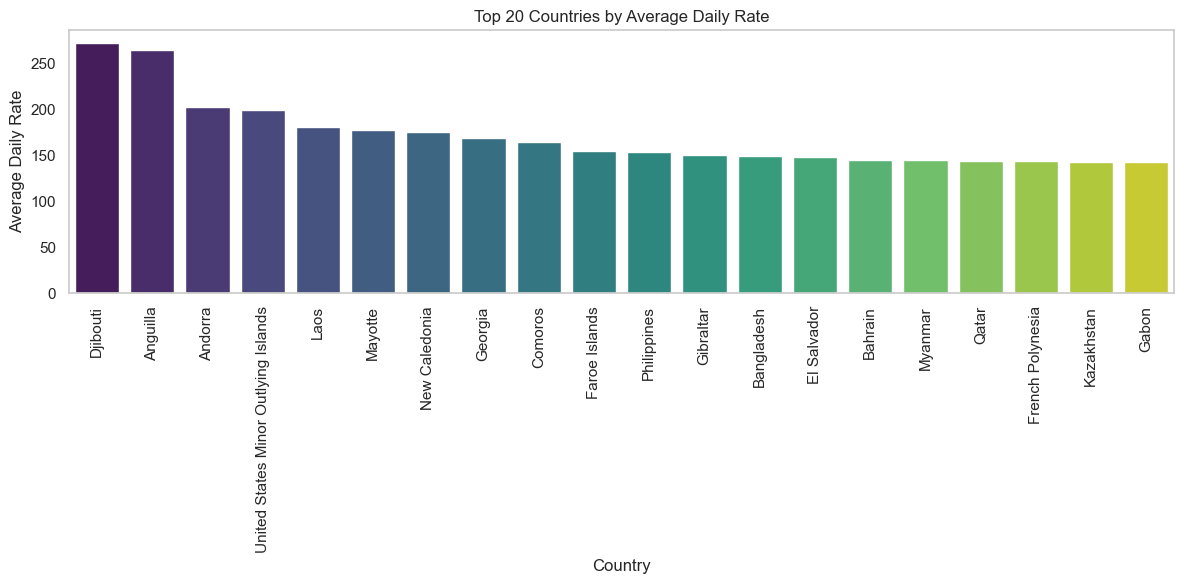

In [177]:
# Create a bar plot for the top 20 countries by average daily rate
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_average_rate, x='Country', y='Average Daily Rate', palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Countries by Average Daily Rate')
plt.xlabel('Country')
plt.ylabel('Average Daily Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


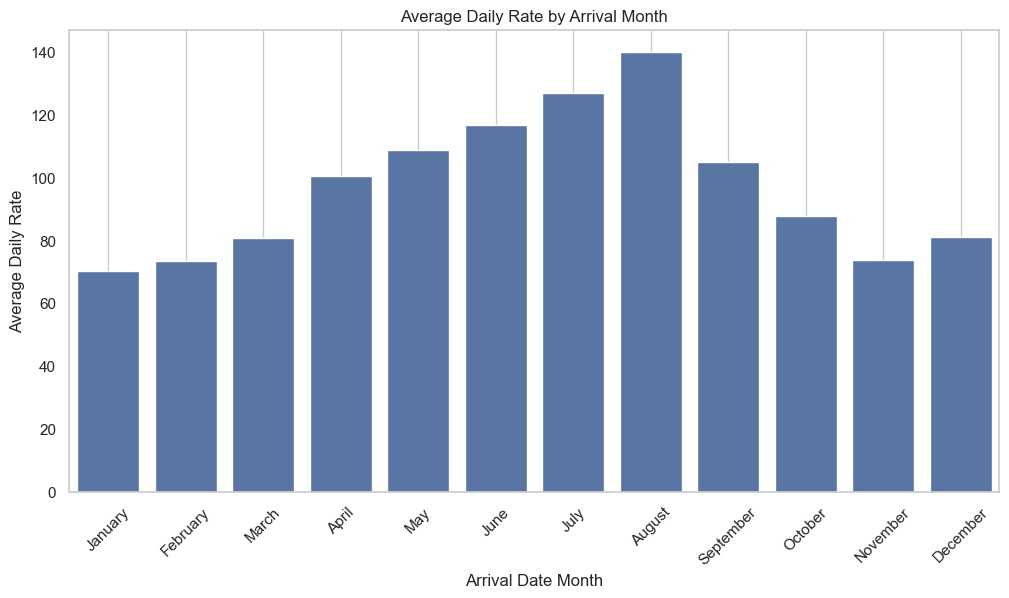

In [164]:
# Visualize the average daily rate by arrival month
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rate_by_month, x='Arrival Date Month', y='Average Daily Rate')
plt.xticks(rotation=45)
plt.title('Average Daily Rate by Arrival Month')
plt.xlabel('Arrival Date Month')
plt.ylabel('Average Daily Rate')
plt.grid()
plt.show()


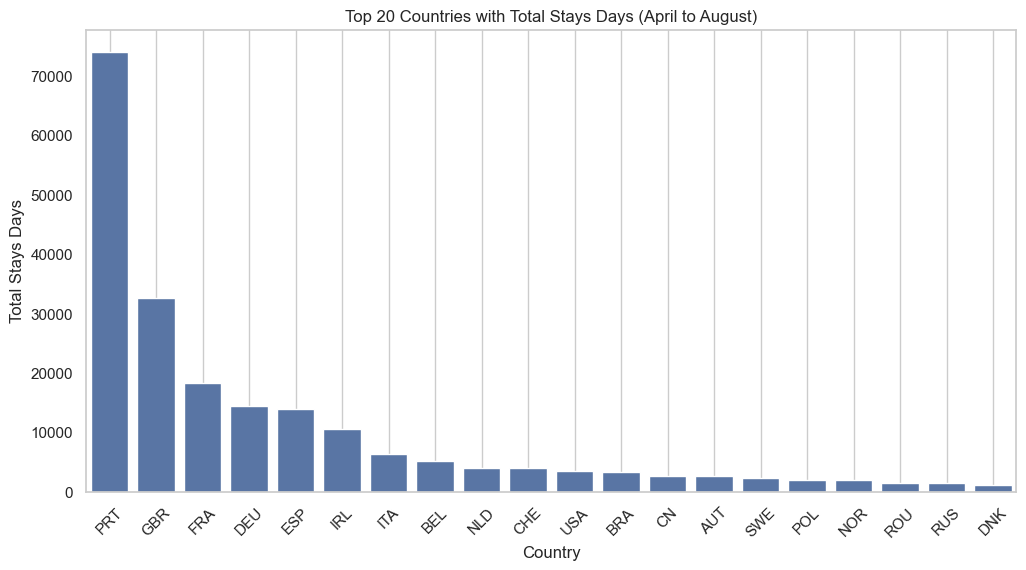

In [165]:
# Visualize the top 20 countries with the most total stays
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_countries, x='Country', y='Total Stays Days')
plt.xticks(rotation=45)
plt.title('Top 20 Countries with Total Stays Days (April to August)')
plt.xlabel('Country')
plt.ylabel('Total Stays Days')
plt.grid()
plt.show()

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_25379/4152179408.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_over_time = filtered_data.groupby(['arrival_date_month', 'country'])['average daily rate'].mean().reset_index()


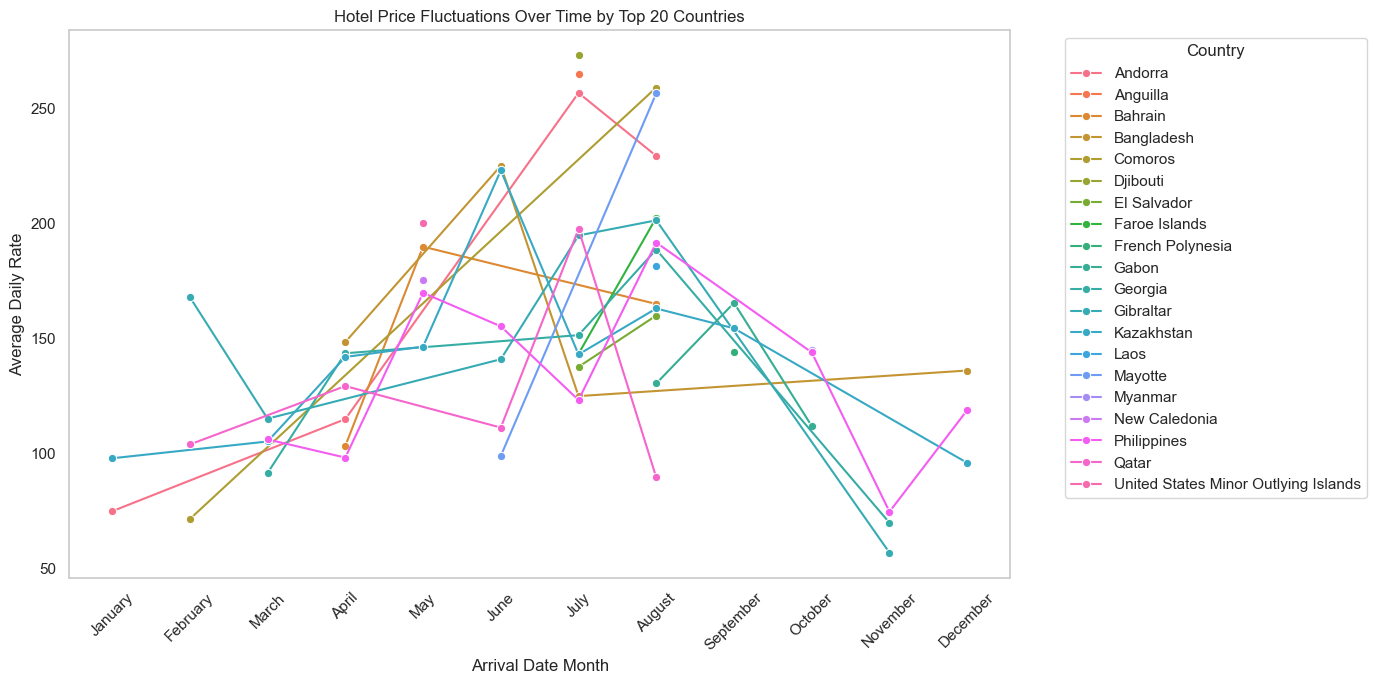

In [166]:
# Dictionary mapping country initials to full names
country_mapping = {
    'AIA': 'Anguilla',
    'AND': 'Andorra',
    'BGD': 'Bangladesh',
    'BHR': 'Bahrain',
    'COM': 'Comoros',
    'DJI': 'Djibouti',
    'FRO': 'Faroe Islands',
    'GAB': 'Gabon',
    'GEO': 'Georgia',
    'GIB': 'Gibraltar',
    'KAZ': 'Kazakhstan',
    'LAO': 'Laos',
    'MMR': 'Myanmar',
    'MYT': 'Mayotte',
    'NCL': 'New Caledonia',
    'PHL': 'Philippines',
    'PYF': 'French Polynesia',
    'QAT': 'Qatar',
    'SLV': 'El Salvador',
    'UMI': 'United States Minor Outlying Islands',
}

# Replace initials with full country names
hotel_data['country'] = hotel_data['country'].replace(country_mapping)

# Ensure 'arrival_date_month' is a categorical type for better plotting
hotel_data['arrival_date_month'] = pd.Categorical(hotel_data['arrival_date_month'], 
                                                   categories=['January', 'February', 'March', 
                                                               'April', 'May', 'June', 
                                                               'July', 'August', 'September', 
                                                               'October', 'November', 'December'], 
                                                   ordered=True)

# Calculate the average daily rate by country
average_rate_by_country = hotel_data.groupby('country')['average daily rate'].mean().reset_index()

# Select the top 20 countries by average daily rate
top_20_countries = average_rate_by_country.sort_values(by='average daily rate', ascending=False).head(20)

# Filter the main DataFrame for only the top 20 countries
filtered_data = hotel_data[hotel_data['country'].isin(top_20_countries['country'])]

# Group by 'arrival_date_month' and 'country' to calculate the average daily rate
average_price_over_time = filtered_data.groupby(['arrival_date_month', 'country'])['average daily rate'].mean().reset_index()

# Create a line plot to visualize price fluctuations over time for the top 20 countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_price_over_time, x='arrival_date_month', y='average daily rate', hue='country', marker='o')
plt.title('Hotel Price Fluctuations Over Time by Top 20 Countries')
plt.xlabel('Arrival Date Month')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_25379/1719334628.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_daily_rates, x='average daily rate', y='country', palette='viridis')


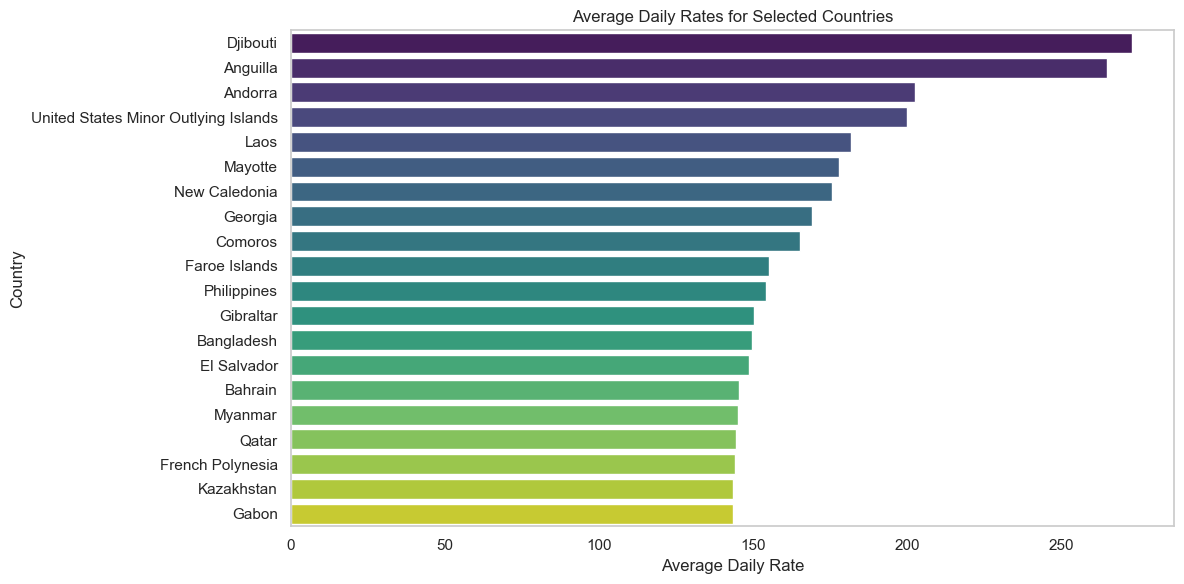

In [174]:
# Replace initials with full country names
country_mapping = {
    'AIA': 'Anguilla',
    'AND': 'Andorra',
    'BGD': 'Bangladesh',
    'BHR': 'Bahrain',
    'COM': 'Comoros',
    'DJI': 'Djibouti',
    'FRO': 'Faroe Islands',
    'GAB': 'Gabon',
    'GEO': 'Georgia',
    'GIB': 'Gibraltar',
    'KAZ': 'Kazakhstan',
    'LAO': 'Laos',
    'MMR': 'Myanmar',
    'MYT': 'Mayotte',
    'NCL': 'New Caledonia',
    'PHL': 'Philippines',
    'PYF': 'French Polynesia',
    'QAT': 'Qatar',
    'SLV': 'El Salvador',
    'UMI': 'United States Minor Outlying Islands',
}

# Replace initials with full country names
hotel_data['country'] = hotel_data['country'].replace(country_mapping)

# List of countries to analyze
countries_of_interest = list(country_mapping.values())

# Calculate the average daily rate for the specified countries
average_daily_rates = hotel_data[hotel_data['country'].isin(countries_of_interest)].groupby('country')['average daily rate'].mean().reset_index()

# Sort values for better visualization
average_daily_rates = average_daily_rates.sort_values(by='average daily rate', ascending=False)

# Create a bar plot to visualize average daily rates
plt.figure(figsize=(12, 6))
sns.barplot(data=average_daily_rates, x='average daily rate', y='country', palette='viridis')

# Add titles and labels
plt.title('Average Daily Rates for Selected Countries')
plt.xlabel('Average Daily Rate')
plt.ylabel('Country')
plt.grid(axis='x')
plt.tight_layout()
plt.show()